In [6]:
#https://www.youtube.com/watch?v=jztwpsIzEGc&t=1928s video used for this project

!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
  Using cached grpcio-1.65.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.7 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached optree-0.12.1-cp310-cp310-manylinux_2_17_x

In [7]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
aiohttp                      3.9.0
aiosignal                    1.3.1
annotated-types              0.7.0
ansi2html                    1.8.0
anyio                        4.4.0
APScheduler                  3.10.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.4
blis                         0.7.11
branca                       0.7.2
catalogue                    2.0.10
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.3.0
click                        8.1.

In [8]:
import tensorflow as tf
import os

2024-08-15 16:26:33.819471: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 16:26:33.868056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 16:26:33.927260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 16:26:33.940689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 16:26:33.972618: I tensorflow/core/platform/cpu_feature_guar

In [9]:
#won't be using a GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

2. Removing Dody Images

In [11]:
import cv2
import imghdr

In [17]:
data_dir = '../content/train' 

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
#loops through every image in the subdir to check to see if the images are good to use.
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Premature end of JPEG file


3. LOAD DATA

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('../content/train')

Found 30250 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

In [29]:
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

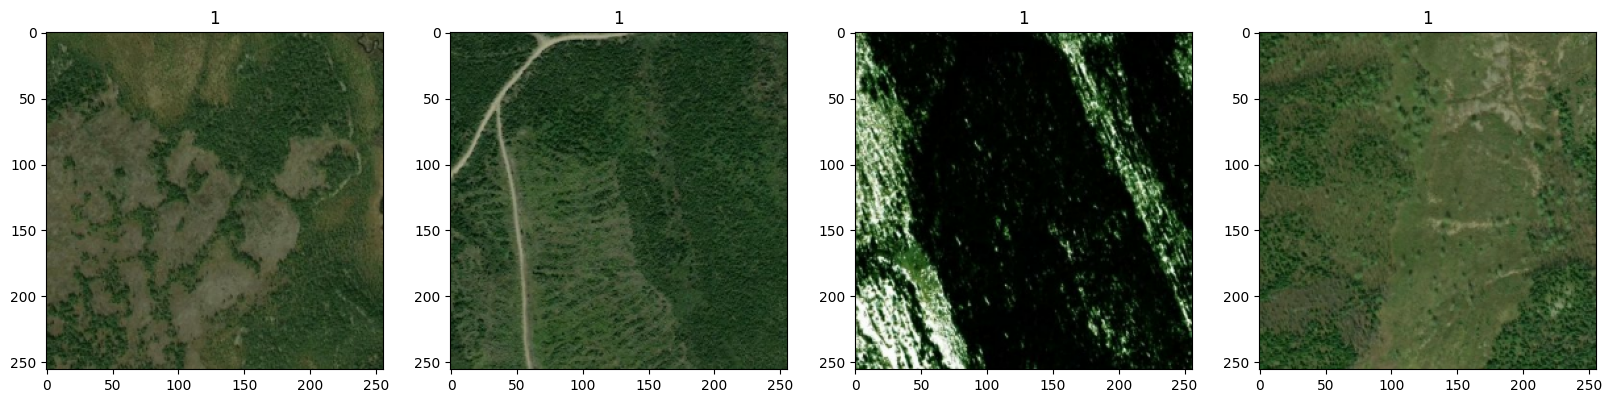

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()


(array([[[[0.33272976, 0.36018074, 0.23076896],
          [0.33782342, 0.3652744 , 0.23586264],
          [0.3130321 , 0.34048307, 0.2110713 ],
          ...,
          [0.27058825, 0.37254903, 0.1882353 ],
          [0.27202645, 0.37398723, 0.18967351],
          [0.27901742, 0.38097823, 0.19666448]],
 
         [[0.2758937 , 0.3076645 , 0.1825726 ],
          [0.25325796, 0.2850288 , 0.15993688],
          [0.27225187, 0.3040227 , 0.17893079],
          ...,
          [0.27292535, 0.37488613, 0.18841247],
          [0.2749081 , 0.37686887, 0.1913655 ],
          [0.27314472, 0.3751055 , 0.19079177]],
 
         [[0.23284535, 0.2694613 , 0.14723176],
          [0.21085887, 0.24938725, 0.1262015 ],
          [0.21807508, 0.2533692 , 0.13180058],
          ...,
          [0.2616132 , 0.36357397, 0.17533869],
          [0.28004852, 0.3820093 , 0.19553563],
          [0.27882966, 0.38079044, 0.19647671]],
 
         ...,
 
         [[0.2508621 , 0.34039727, 0.17767411],
          [0.24807

5. Build Deep Learning Model

In [60]:
perc_of_data = .7
train = data.take(int(len(data)*perc_of_data))

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [63]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

6. TRAIN

In [66]:
logdir='logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
dataVal = tf.keras.utils.image_dataset_from_directory('../content/valid')
val = data.take(int(len(dataVal)))

Found 6300 files belonging to 2 classes.


In [69]:
#training the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


662/662 ━━━━━━━━━━━━━━━━━━━━ 260s 383ms/step - accuracy: 0.8765 - loss: 0.2880 - val_accuracy: 0.8893 - val_loss: 0.2515
Epoch 2/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 252s 380ms/step - accuracy: 0.9363 - loss: 0.1670 - val_accuracy: 0.9548 - val_loss: 0.1199
Epoch 3/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 230s 348ms/step - accuracy: 0.9518 - loss: 0.1292 - val_accuracy: 0.9373 - val_loss: 0.1586
Epoch 4/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 255s 385ms/step - accuracy: 0.9570 - loss: 0.1122 - val_accuracy: 0.9591 - val_loss: 0.1057
Epoch 5/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 241s 364ms/step - accuracy: 0.9683 - loss: 0.0867 - val_accuracy: 0.9778 - val_loss: 0.0599
Epoch 6/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 264s 398ms/step - accuracy: 0.9792 - loss: 0.0593 - val_accuracy: 0.9811 - val_loss: 0.0561
Epoch 7/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 340s 425ms/step - accuracy: 0.9826 - loss: 0.0489 - val_accuracy: 0.9854 - val_loss: 0.0433
Epoch 8/20
662/662 ━━━━━━━━━━━━━━━━━━━━ 262s 395ms/step - accuracy: 0.9871 - loss: 0.03

7. Save and load model

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','imageclassifier.h5'))


8. Plot Performance

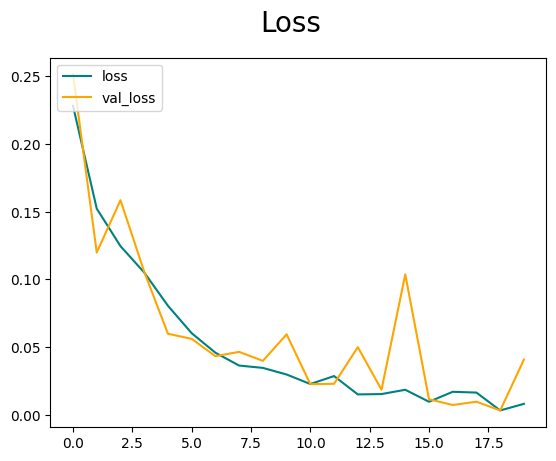

In [89]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

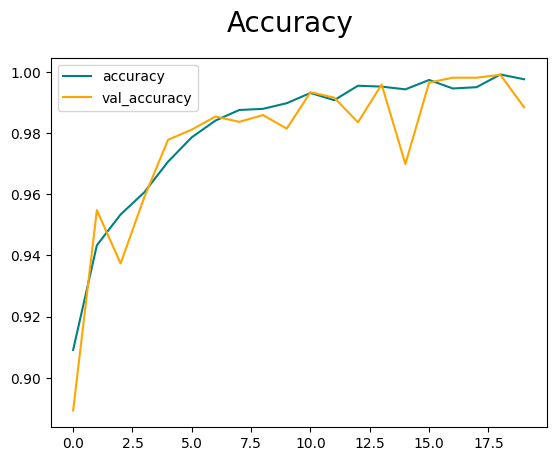

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Test

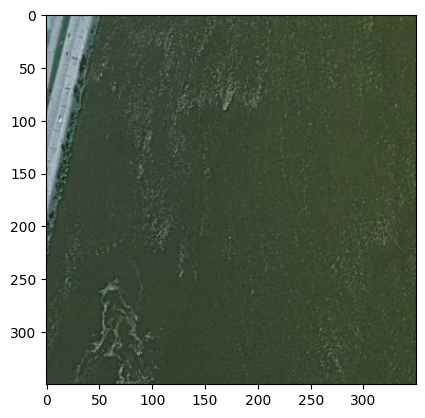

In [75]:
#non-Wildfire
img = cv2.imread('../content/test/nowildfire/-73.535,45.480806.jpg')
plt.imshow(img)
plt.show()

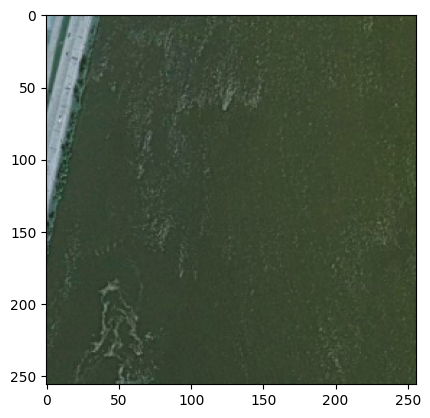

In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > .5:
    print("This is not a wildfire")
else:
    print("This is a wildfire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This is a wildfire


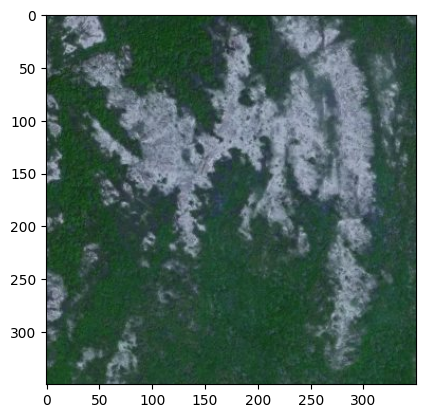

In [78]:
#Wildfire
img = cv2.imread('../content/test/wildfire/-59.03238,51.85132.jpg')
plt.imshow(img)
plt.show()

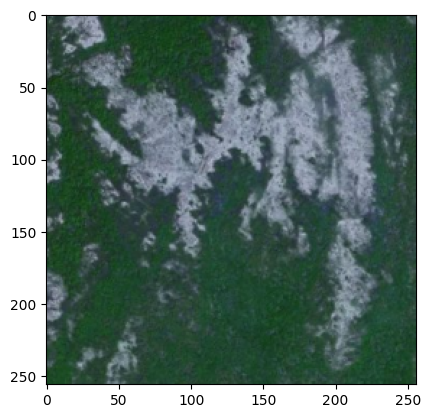

In [79]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > .5:
    print("This is not a wildfire")
else:
    print("This is a wildfire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This is a wildfire


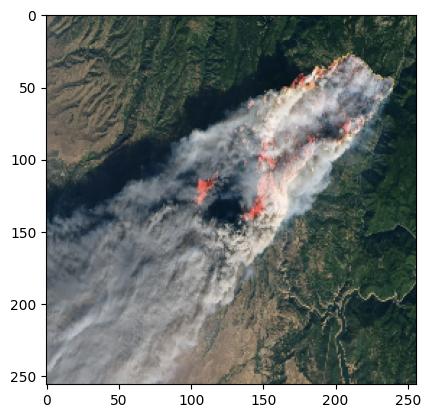

In [94]:
img = cv2.imread('../fire.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

if yhat > .5:
    print("This is not a wildfire")
else:
    print("This is a wildfire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[1.9602852e-07]]
This is a wildfire


In [97]:
new_model = load_model('../models/imageclassifier.h5')

In [100]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))
print(yhat)

if yhat > .5:
    print("This is not a wildfire")
else:
    print("This is a wildfire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[1.9602852e-07]]
This is a wildfire
